# Дипломный проект
**Постановка задачи:** Проанализируйте клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка.

- Проведите исследовательский анализ данных,
- Выделите портреты клиентов, которые склонны уходить из банка,
- Сформулируйте и проверьте статистические гипотезы.
   
**Цель:** провести сегментацию клиентов банков, исследовать особенности клиентов, которые прекращают пользоваться услугами банка, после чего дать продуктовым менеджерам рекомендации по удержанию клиентов.

**Гипотезы:**   
   *1. Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.*  
   *2. Проверьте гипотезу, что доли ушедших клиентов, разделенных по полу, равны между собой.*
    

# Материалы:
* [Презентация](https://drive.google.com/file/d/1IIHn5CnDqkfjQ7uBy_iDKrGCs1owmCL4/view?usp=sharing)
* [Дашборд](https://public.tableau.com/app/profile/dima.kunnfld/viz/bank_case_dashboard/Dashboard1?publish=yes)

# Декомпозиция
1. **Загрузка и знакомство с данными**    
2. **Предобработка данных**  
    1. Приведение данных к стандартизированному формату
     - [X] Проверить и изменить именования столбцов 
     - [X] Привести поля к нужным типам данных
    2. Обработка пропусков
     - [X] Исследовать относительные потери в пропусках 
     - [X] Принять решение о заполнении пропусков (объяснить почему надо заполнять/не заполнять пропуски)
    3. Поиск и устранение дубликатов
     - [X] Проверить записи на повторение user_id, устранить дубликаты
     - [X] Проверить именования городов на уникальные названия, устранить дубликаты
    4. Добавить дополнительные поля в датасете
     - [X] Извлечь информацию о городе клиента и закодировать в бинарном виде
     - [X] Записать пол в бинарном представлении  
     Данный пункт необходим, чтобы в дальнейшем можно было проводить численные эксперименты (например расчёт коэффициента кореляции)
3. **Исследовательский анализ данных**
   1. Как распределены клиенты по возрасту? Как изменится возраст, если дополнительным признаком указать пол клиента?  
     **Примечание:** Строить график в виде диаграммы с размахом.  
   2. Какая корреляция между наличием кредитной картой и возрастом? Между наличием кредитной карты и зарплаты?   
    **Примечание:** Здесь нельзя посчитать коэффициент Пирсона (один признак бинарный, а второй количественный), поэтому я бы использовал коэффициент Спирмена (scipy.stats.spearmanr)  
   3. Посмотреть как распределены клиенты по городам. В каком городе больше всего пользуется банк популярностью?
   4. Какое распределение баллов кредитного скоринга? Каким образом очки скоринга коррелируют с числом объектов недвижимости?
    **Примечание:** во втором вопросе снова использовал бы коэф. Спирмена (разная природа данных).
   5. Как размер заработной платы клиента коррелирует с уходом пользователя от банка (показатель churn)?   
    **Примечание:** снова коэф. Спирмена =).
   6. Посмотреть на распределение заработной платы. Исследовать аномалии. Сосчитать какую долю от своей зарплаты клиент держит на балансе. Каким образом распределены эти доли, если дополнительным признаком учитывать параметр churn?
   7. Как распределены пользователи, использующие n число продуктов, учитывая их пол? А если добавить параметр churn?
   8. Каким образом распределено количество имущества между клиентами в городах? Если они распределны нормально, то можно сосчитать средний балл скоринга по городам и сделать вывод о том, влияет ли город на значение скоринга.  
4. **Формирование портрета пользователей**
    1. По общим признакам сформировать портрет клиентов, которых удерживает банк. Как минимум 1 такой портрет, но если покажутся различия существенными, то можно выделить дополнительные портреты
    2. По аналогии определить портреты клиентов, которым свойственно уходить из банка
5. **Проверка гипотез**
    1. Проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались.
    **Примечание:** здесь собираюсь использоваться статистическим критерием Манна-Уитни
    2. Проверка гипотезы, что доли ушедших клиентов, разделенных по полу, равны между собой.
    **Примечание:** здесь собираюсь использоваться  z-test. (проверка равенства долей)
6. **Рекомендации по удержанию оттока пользователей**  
    По общему анализу, сделать сопоставление портретов и выделить ключевые преимущества, которые можно сформулировать для людей, которые уходит от банка по тем или иным признакам.  
7. **Составление презентации**  
    Составить презентацию, включив в нее важный инсайты о данных, портреты пользователей и рекомендации по удержанию клиентов.  
P.S. Я внизу уже начал работу

## Импорт библиотек 

In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math as mth

# Настройка шрифтов на графиках
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# Загрузка и предобработка данных

In [2]:
# Укажите файл, где находится csv - файл
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"
df=pd.read_csv(path)


In [3]:
df

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


##  Обработка пропусков, приведение типов данных и названия колонок 

Первым, что сделаем, приведем имена колонок к общепринятым стандартам обозначения имен столбцев.

In [4]:
df.columns = df.columns.str.lower()
df.rename(columns={'userid':'user_id'},inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Из первого, что бросается в глаза, что нужно привести age к типу данных int (а не float). Остальные поля в соотвествующих типах данных.

In [6]:
df['age'] = df['age'].astype('Int64')

In [7]:
round(df.isna().sum().sort_values(ascending=False)*100/df.shape[0],2)

balance          22.95
age               0.26
user_id           0.00
score             0.00
city              0.00
gender            0.00
equity            0.00
products          0.00
credit_card       0.00
last_activity     0.00
est_salary        0.00
churn             0.00
dtype: float64

В относительных показателях есть значительные пропуски в balance (~23% от всех данных) и несколько пропусков в age (около 36).

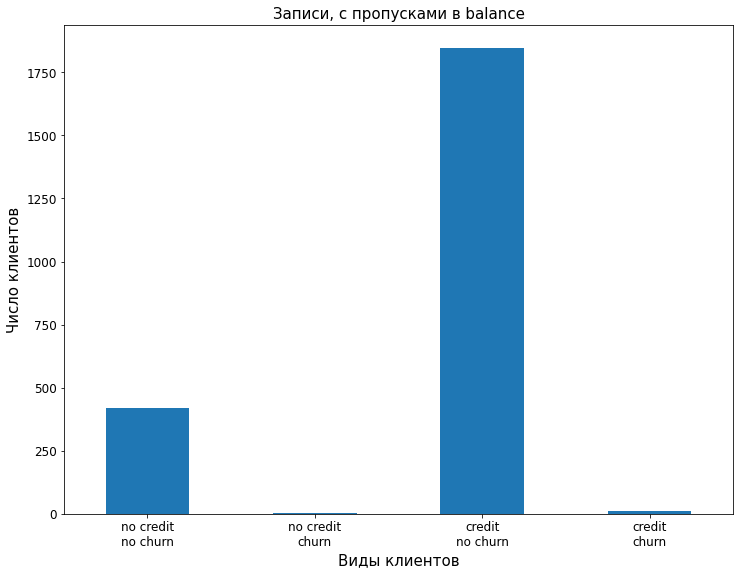

In [8]:
#
df.dropna(subset=['age'],inplace=True)
df.reset_index(drop=True,inplace=True)
#
plt.figure(figsize=(12,9))
df[df['balance'].isna()].groupby(['credit_card','churn']).count()['user_id'].plot(kind='bar')
plt.ylabel('Число клиентов',fontsize=15);
plt.title('Записи, с пропусками в balance',fontsize=15);
plt.xlabel('Виды клиентов',fontsize=15);
plt.gca().set_xticklabels(['no credit\nno churn','no credit\nchurn','credit\nno churn','credit\nchurn'])
for tick in plt.gca().get_xticklabels():
    tick.set_rotation(0)
plt.show()

Стоит отметить, что много пропусков у клиентов, которые не отказались от банка, кроме того, большая часть этих людей имеет кредитные карты, которыми должно быть не пользуются и придерживают до "лучших дней".  
Но есть люди, у которых нет кредитной карты и неизвестно ничего об их балансе. Потенциально они могут стать людьми, которые уйдут от банка?        
В любом случае, предположительно - это нормальное поведение среди клиентов и такая информация должна учитываться в анализе. С этими пропусками ничего не поделать.

## Обработка дубликатов

In [9]:
print('Число повторяющихся записей: ', df['user_id'].shape[0] - df['user_id'].nunique())

Число повторяющихся записей:  50


Повторяющиеся записи по уникальному ключу о каком-то техническом сбои. Для нас это не интересно, поэтому удалим их, более того это незначительные потери для всей выборки в целом.

In [10]:
df.drop_duplicates(inplace=True,subset=['user_id'])

In [11]:
df['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

В названии городов нет неявных дубликатов, это хороший знак.

# Аномалии

`age`, `score`, `balance`, `est_salary` - непрерывные величины, по котором целесообразно построить гистограммы 

`equity`, `last_activity`, `products`, `gender` - дискретные величины или категориальные признаки, по которым проще всего простроить barplot 

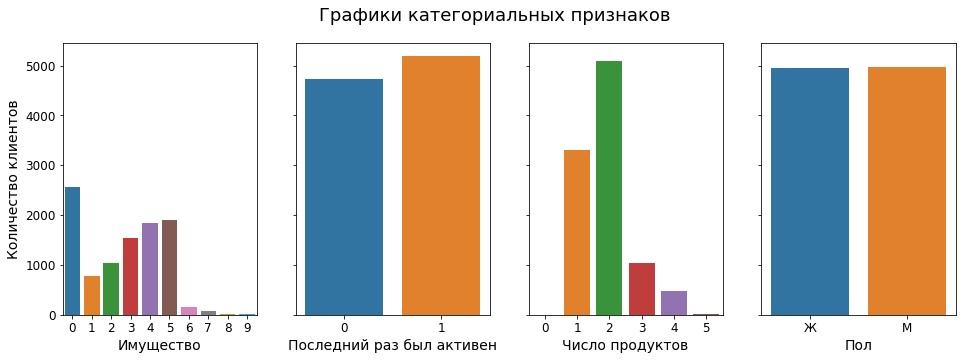

In [12]:
categories = ['equity','last_activity','products','gender']
ru = ['Имущество','Последний раз был активен','Число продуктов','Пол']
fig,axes = plt.subplots(1,4,figsize=(16,5),sharey=True)
for i,category in enumerate(categories):
    sns.countplot(data=df,x=category,ax=axes[i])
    if (i>0): axes[i].set_ylabel(None)  
    else: axes[i].set_ylabel('Количество клиентов')
    axes[i].set_xlabel(ru[i])
plt.suptitle('Графики категориальных признаков')
plt.show()

In [13]:
df.query('products == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8939,147837,962.0,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1


Из аномального есть 1 клиент, которые не пользуется продуктами банка. Он мешает делать наглядные графики, поэтому уберем его.

In [14]:
df.drop([8939],inplace=True)
df.reset_index(drop=True,inplace=True)

Остальное выглядит приемлимым образом, об аномалиях сказать нечего.

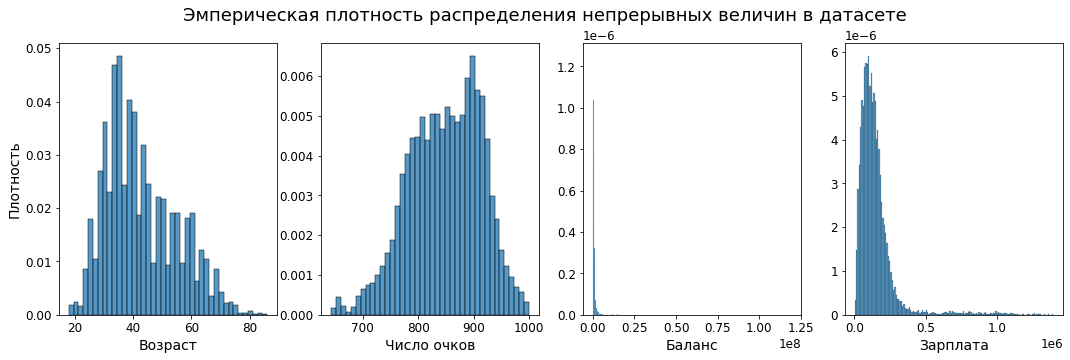

In [15]:
cont_quantity = ['age', 'score', 'balance', 'est_salary']
ru_cont_quantity = ['Возраст','Число очков','Баланс','Зарплата']
fig,axes = plt.subplots(1,4,figsize=(18,5))
for i,category in enumerate(cont_quantity):
    sns.histplot(data=df,x=category,ax=axes[i],stat='density',common_norm=False)
    if (i>0): axes[i].set_ylabel(None)  
    else: axes[i].set_ylabel('Плотность')
    axes[i].set_xlabel(ru_cont_quantity[i])
plt.suptitle('Эмперическая плотность распределения непрерывных величин в датасете')
plt.show()

1) В целом возраст, числа скоринга по виду напоминают нормальное распределение и кажется, что это соотвествует природе данных  
2) Касательно зарплат можно выделить, что они распределены нормально, просто есть граница между людьми, кто работает как специалист, зарплаты у которых четко определены (по графику предположительно до 300-500 тыс. рублей), а тянущийся хвост это возможно клиенты, владеющие своим ИП и самостоятельно начисляющие себе з/п, либо суперквалифицированные специалисты. 
Это хороший повод разделить эти самые данные  (что я потом и сделаю, создав поле high_salary)  
3) С балансом все еще не ясно, что происходит.

In [16]:
df['balance'].describe([.25,.05,.75,0.9,0.95,0.99])

count    7.664000e+03
mean     8.282063e+05
std      1.984122e+06
min      0.000000e+00
5%       9.998609e+04
25%      2.955266e+05
50%      5.249277e+05
75%      9.807537e+05
90%      1.460629e+06
95%      2.120140e+06
99%      4.827291e+06
max      1.191136e+08
Name: balance, dtype: float64

Исследовав статистики, можно предположить, что во-первых - нулевой баланс очень сильно искажает распределение (о чем уже было сказано выше), кроме того, 5% всех клиентов имеют на балансы значительно больше суммы по сравнению со среднестатистическим клиетом, поэтому их тоже стоит отделить, эту аномалию нужно отметить (что будет сделано позже). 

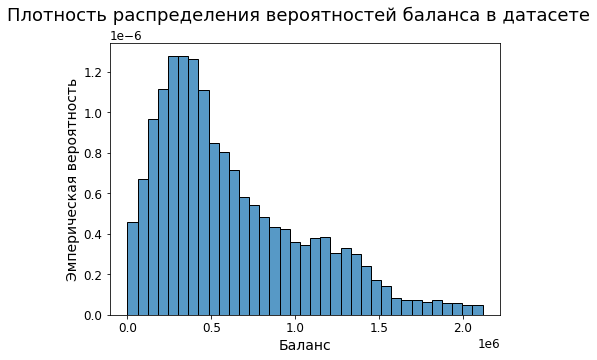

Значение, которое отделяет высокие балансы: 2120139.67


In [17]:
separator = np.nanpercentile(df['balance'], 95)
plt.figure(figsize=(7,5))
sns.histplot(data=df.query('balance < @separator and balance > 0')
             ,x='balance',stat='density')
plt.suptitle('Плотность распределения вероятностей баланса в датасете')
plt.xlabel('Баланс')
plt.ylabel('Эмперическая вероятность')
plt.show()
print('Значение, которое отделяет высокие балансы: %0.2f' % separator)

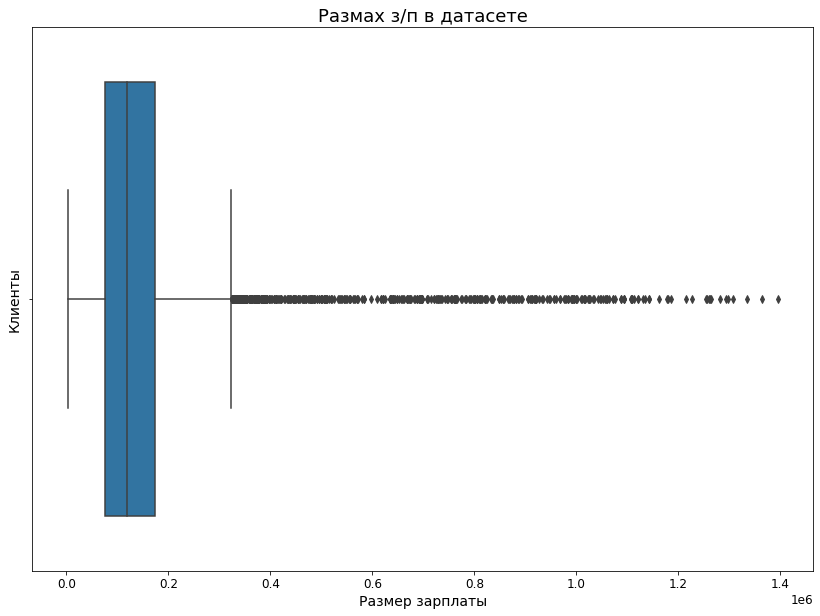

In [18]:
plt.figure(figsize=(14,10))
sns.boxplot(data=df,x=df['est_salary'])
plt.gca().set_xlabel('Размер зарплаты')
plt.gca().set_ylabel('Клиенты')
plt.gca().set_title('Размах з/п в датасете')
plt.show()

In [19]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
(df.describe(percentiles=[.25,.5,.75,.90,.95])['est_salary'])

count      9923.000
mean     147892.555
std      139359.863
min        2546.300
25%       75255.860
50%      119719.330
75%      174673.285
90%      242322.348
95%      316840.891
max     1395064.450
Name: est_salary, dtype: float64

In [20]:
high_salary = df[(df['est_salary'] > np.percentile(df['est_salary'],[95])[0])]

In [21]:
high_salary.groupby(by='churn').agg({'user_id':'count','est_salary':['max','median','mean','min']})

user_id  est_salary                                 
        count         max     median       mean        min
churn                                                     
0         415 1395064.450 556344.700 629080.758 316885.080
1          82 1263028.490 463494.715 570577.946 318047.410

Много выбивающихся значений, надо посмотреть на аномалии.

In [22]:
print("Всего клиентов, имеющих высокие зарплаты: ",high_salary.shape[0],
"\nОтносительное число оттошедших клиентов с высокими зарплатами: %.3f процентов от всего датасета" % (82*100/df.shape[0]),
"\nПроцент клиентов с высокими зарплатами  %.3f процента от всего числа ушедших людей" % ((82*100)/df.query('churn == 1').shape[0]))

Всего клиентов, имеющих высокие зарплаты:  497 
Относительное число оттошедших клиентов с высокими зарплатами: 0.826 процентов от всего датасета 
Процент клиентов с высокими зарплатами  4.510 процента от всего числа ушедших людей


Люди, имеющие значительно выше зарплату медианного значения - это 5 % датасета. Следует оставить эти значения и здесь уже есть предположения, что можно сформулировать первый портрет клиентов - такие у которых высокая зарплата и которые не охотно уходят от банка.    
Этих самых клиентов можно пока разметить дополнительным полем high_salary, использовав в качестве критерия минимальную зарплату из этих 5% обеспеченных клиентов.

# Дополнительные признаки 
Первым, что надо сделать это перекодировать города и пол клиентов.

In [23]:
def code_gender(row):
        if (row['gender'] == 'М'):
            return 1
        else:
            return 0
        
def high_balance(row):
        if(row['balance'] > 1847359.36):
            return 1
        else:
            return 0
def high_salary(row):
        if (row['est_salary'] > 316890.370):
            return 1
        else:
            return 0

In [24]:
df['gender_b'] = df.apply(code_gender,axis=1)
df['high_balance'] = df.apply(high_balance,axis=1)
df['high_salary'] = df.apply(high_salary,axis=1)

In [25]:
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_b,high_balance,high_salary
0,183012,850.000,Рыбинск,Ж,25,1,59214.820,2,0,1,75719.140,1,0,0,0
1,146556,861.000,Рыбинск,Ж,37,5,850594.330,3,1,0,86621.770,0,0,0,0
2,120722,892.000,Рыбинск,Ж,30,0,NaN,1,1,1,107683.340,0,0,0,0
3,225363,866.000,Ярославль,Ж,51,5,1524746.260,2,0,1,174423.530,1,0,0,0
4,157978,730.000,Ярославль,М,34,5,174.000,1,1,0,67353.160,1,1,0,0


In [26]:
df = df.join(
    pd.get_dummies(df['city'])
    )
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_b,high_balance,high_salary,Ростов,Рыбинск,Ярославль
0,183012,850.000,Рыбинск,Ж,25,1,59214.820,2,0,1,75719.140,1,0,0,0,0,1,0
1,146556,861.000,Рыбинск,Ж,37,5,850594.330,3,1,0,86621.770,0,0,0,0,0,1,0
2,120722,892.000,Рыбинск,Ж,30,0,NaN,1,1,1,107683.340,0,0,0,0,0,1,0
3,225363,866.000,Ярославль,Ж,51,5,1524746.260,2,0,1,174423.530,1,0,0,0,0,0,1
4,157978,730.000,Ярославль,М,34,5,174.000,1,1,0,67353.160,1,1,0,0,0,0,1


# Исследовательский анализ данных

In [27]:
def set_graph(x,y,title,a,b):
    # Работает для 1 графика, если же надо сделать шаблон для нескольких графиков, то надо использовать 
    # gcf() - get figure, get_axes() - get axes, gca() - get current axis, sca() - set current axis
    plt.gca().set_xlabel(x)
    plt.gca().set_ylabel(y)
    plt.gca().set_title(title)
    plt.gcf().set_figwidth(a)
    plt.gcf().set_figheight(b)
def label_bar(ax):
    for p in ax.patches:
         height = p.get_height()
     # adding text to each bar
         ax.text(x = p.get_x()+(p.get_width()/2),
         y = height+25, 
         s = '{:.0f}'.format(height),
         ha = 'center') 
    

## 1. Как распределены клиенты по возрасту? Как изменится возраст, если дополнительным признаком указать пол клиента?
Примечание: Строить график в виде диаграммы с размахом.

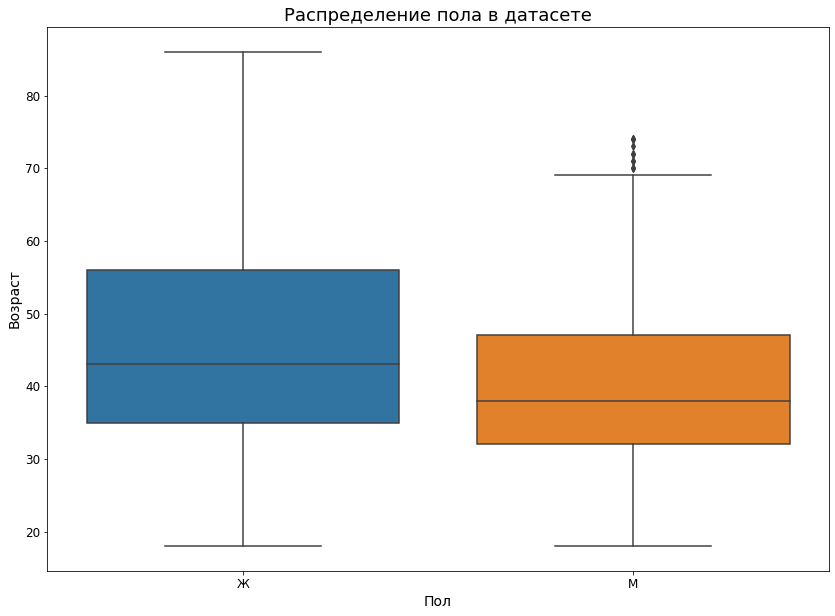

In [28]:
sns.boxplot(data=df,y='age',x='gender')
set_graph('Пол','Возраст','Распределение пола в датасете',14,10)

In [29]:
df[(df['age'] > 70) & (df['gender_b'] == 1)]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_b,high_balance,high_salary,Ростов,Рыбинск,Ярославль
1013,203265,789.000,Рыбинск,М,71,4,860793.610,2,1,1,66215.750,0,1,0,0,0,1,0
1855,160511,773.000,Ярославль,М,72,3,279713.760,1,1,0,53571.890,0,1,0,0,0,0,1
4872,161183,700.000,Ярославль,М,71,0,NaN,1,1,1,579562.960,0,1,0,1,0,0,1
4990,131345,961.000,Ярославль,М,73,4,848772.700,1,1,1,688096.180,0,1,0,1,0,0,1
5098,128681,792.000,Рыбинск,М,74,3,1107392.730,2,0,0,64847.880,0,1,0,0,0,1,0
7126,191947,918.000,Ярославль,М,72,6,785407.330,3,0,1,446076.010,1,1,0,1,0,0,1
8287,159137,975.000,Ярославль,М,74,0,NaN,1,1,0,673633.790,0,1,0,1,0,0,1
8625,163113,732.000,Ярославль,М,74,3,45.000,2,0,1,55753.960,0,1,0,0,0,0,1


In [30]:
df['age'].median()

40.0

**Вывод:** размах возраста клиентов по полу приблизительно одинаковый, медианное значение  в общем случае составляет 40 лет.

# 2 Какая корреляция между наличием кредитной картой и возрастом? Между наличием кредитной карты и зарплаты?
Примечание: Здесь нельзя посчитать коэффициент Пирсона (один признак бинарный, а второй количественный), поэтому я бы использовал коэффициент Спирмена (scipy.stats.spearmanr) 

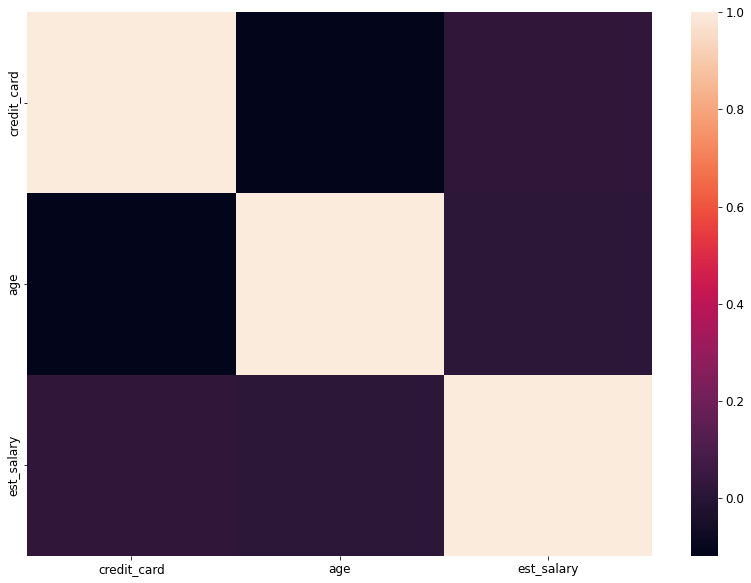

In [31]:
plt.figure(figsize=(14,10))
corr_1 = df[['credit_card','age','est_salary']].corr(method='spearman')
sns.heatmap(corr_1)
plt.show()

In [32]:
corr_1

,credit_card,age,est_salary
credit_card,1.000,-0.118,0.023
age,-0.118,1.000,0.015
est_salary,0.023,0.015,1.000


**Вывод:** гипотезы не подтвердились, никаких зависимостей между этими признаками - нет (связь очень слабая).

## 3 Посмотреть как распределены клиенты по городам. В каком городе больше всего пользуется банк популярностью?

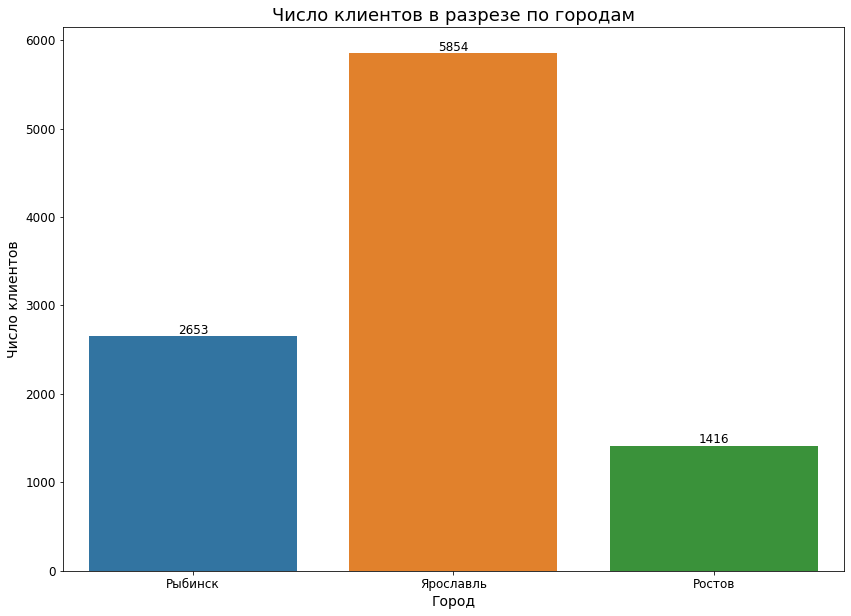

In [33]:
plt.figure(figsize=(14,10))
ax = sns.countplot(data=df,x='city')
plt.title('Число клиентов в разрезе по городам')
plt.xlabel('Город')
plt.ylabel('Число клиентов')
label_bar(plt.gca())
plt.show()

**Вывод:** Ярославль самый `модный` город в датасете (> 50%  всех клиентов), затем Рыбинск и Ростов.

# 4 Какое распределение баллов кредитного скоринга? Каким образом очки скоринга коррелируют с числом объектов недвижимости?

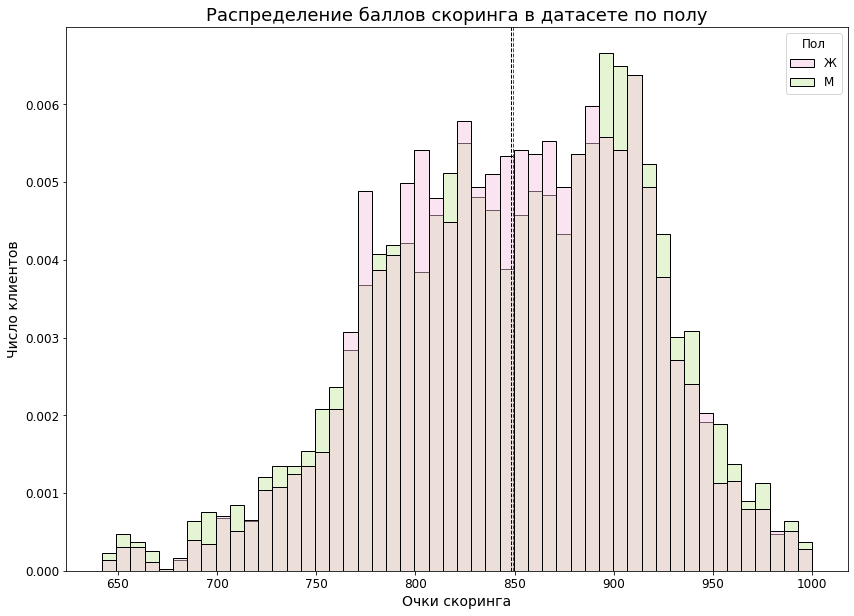

In [34]:
plt.figure(figsize=(14,10))
sns.histplot(data=df,x='score',palette= 'PiYG',alpha=0.45,hue='gender',bins=50,stat='density',common_norm=False)
plt.axvline(df[df['gender'] == 'М']['score'].mean(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(df[df['gender'] == 'Ж']['score'].mean(), color='k', linestyle='dashed', linewidth=1)
set_graph('Очки скоринга','Число клиентов','Распределение баллов скоринга в датасете по полу',14,10)
plt.gca().get_legend().set_title("Пол")
plt.show()

- От 650 до 1000 очков.
- Среднее у мужчин и женщин приблизительно одинаково - 850 очков.

In [35]:
df['score'].corr(df['equity'],method='spearman')

0.020462463060559495

In [36]:
df['score'].corr(df['products'],method='spearman')

-0.08517028889486306

**Вывод:** балл скоринга не зависит от пола, распределение баллов от 650 до 1000, среднее значение балла среди всех клиентов 850.

# 5 Посмотреть на размах заработной платы. 
Как размер заработной платы клиента коррелирует с уходом пользователя от банка (показатель churn)?
Примечание: снова коэф. Спирмена =).

In [37]:
df['est_salary'].corr(df['churn'])

0.0015801227197664667

Прямой корреляции нет, но это не значит, что данные параметры не взаимосвязаны.

In [38]:
df[df['high_salary'] == 0].describe()['est_salary']

count     9428.000
mean    123071.244
std      64600.991
min       2546.300
25%      73121.822
50%     115312.965
75%     164784.100
max     316890.370
Name: est_salary, dtype: float64

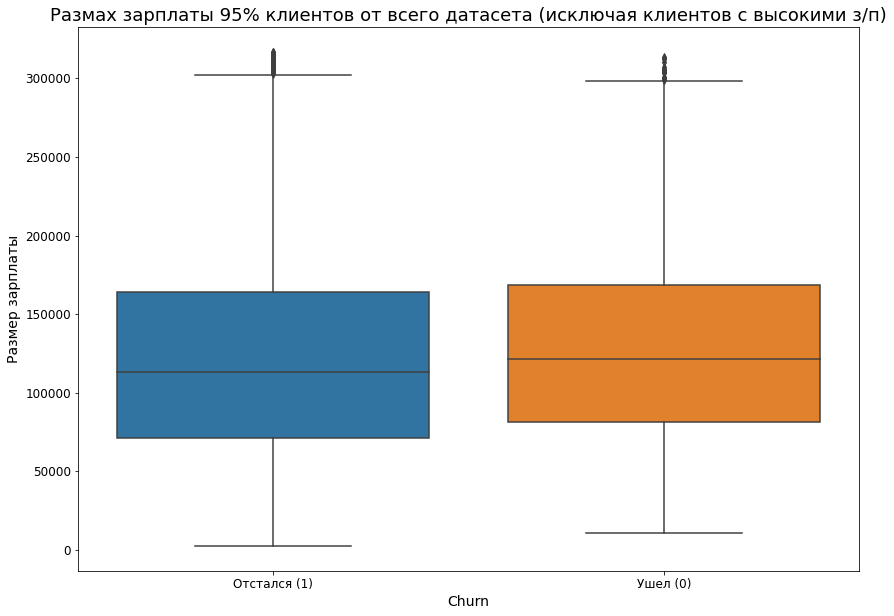

In [39]:
sns.boxplot(data=df[df['high_salary'] == 0],y='est_salary',x='churn');
set_graph('Churn','Размер зарплаты','Размах зарплаты 95% клиентов от всего датасета (исключая клиентов с высокими з/п)',14,10)
plt.gca().set_xticklabels(['Отстался (1)','Ушел (0)'])
plt.show()

**Вывод:** размер зарплаты, который не превышает значение высокой зарплаты (около 300 тыс. у.е.), не влияет на то уйдет или не уйдет пользователь, так как
размах зарплат приблизительно одинаковый. Если же пользователь имеет все же высокую з/п - то вероятнее всего он не собирается уходить от пользователей.

## 6 Как распределены пользователи, использующие n число продуктов, учитывая их пол? А если добавить параметр churn?

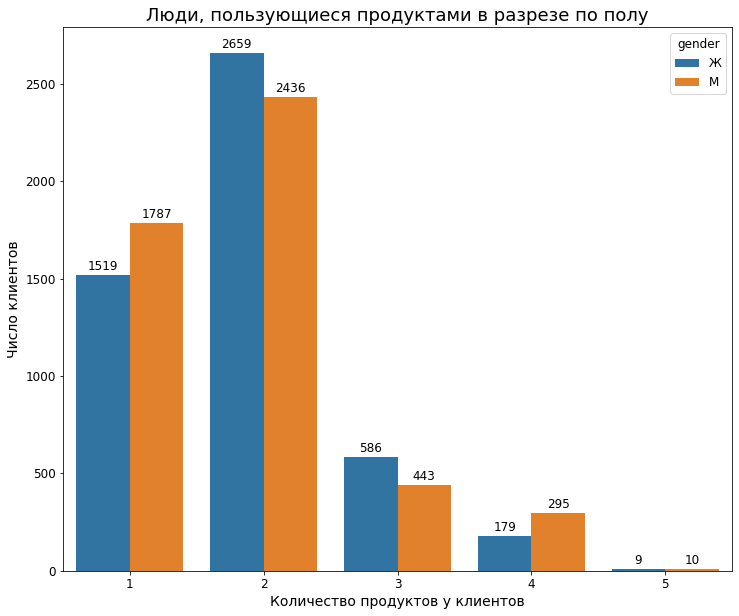

In [40]:
ax=sns.countplot(data=df,x='products', hue='gender')
label_bar(plt.gca())
#ax.bar_label(ax.containers[1])
set_graph('Количество продуктов у клиентов','Число клиентов','Люди, пользующиеся продуктами в разрезе по полу',12,10)


In [41]:
df[df['products'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_b,high_balance,high_salary,Ростов,Рыбинск,Ярославль


Единственный клиент, который не пользовался каким-либо продуктом банка.

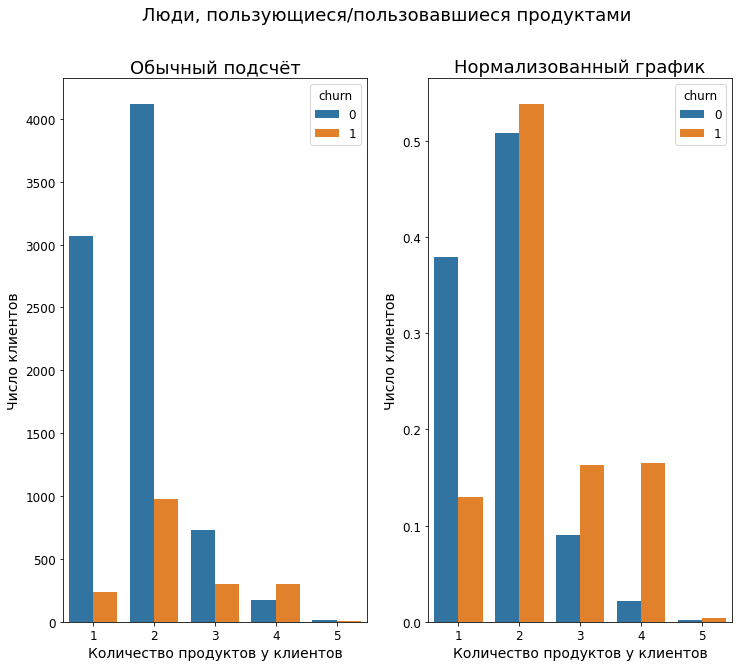

In [42]:
f, axes = plt.subplots(1, 2)
f.suptitle('Люди, пользующиеся/пользовавшиеся продуктами')
prop_df = (df['products']
           .groupby(df['churn'])
           .value_counts(normalize=True)
           .rename('prop')
           .reset_index())
# 1 График
ax = sns.countplot(data=df,x='products', hue='churn',ax=axes[0])
label_bar(plt.gca())
plt.sca(axes[0])
set_graph('Количество продуктов у клиентов','Число клиентов','Обычный подсчёт',12,10)
# 2 График
sns.barplot(x='products', y='prop', hue='churn', data=prop_df, ax=axes[1])
plt.sca(axes[1])
set_graph('Количество продуктов у клиентов','Число клиентов','Нормализованный график',12,10)
plt.show()

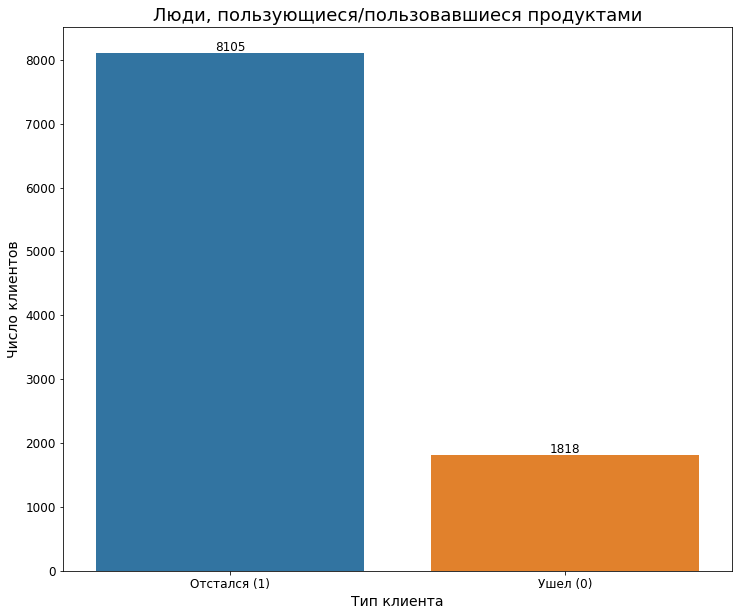

In [43]:
ax = sns.countplot(data=df,x='churn')
label_bar(plt.gca())
set_graph('Тип клиента','Число клиентов','Люди, пользующиеся/пользовавшиеся продуктами',12,10)
plt.gca().set_xticklabels(['Отстался (1)','Ушел (0)'])
plt.show()

**Вывод:** 2 продукта - это достаточно классическая комбинация для людей, которые пользуются продуктами банк, больше половины клиентов, которые ушли от банка - имели 2 продукта. Такого рода людей особенно стоит проанализировать для сегментации клиентов.
Остальные же доли клиентов, которые отошли, пользующимися 1,3,4 продуктами приблизительно равны. 

## 7 Каким образом распределено количество имущества между клиентами в городах? Если они распределны нормально, то можно сосчитать средний балл скоринга по городам и сделать вывод о том, влияет ли город на значение скоринга.


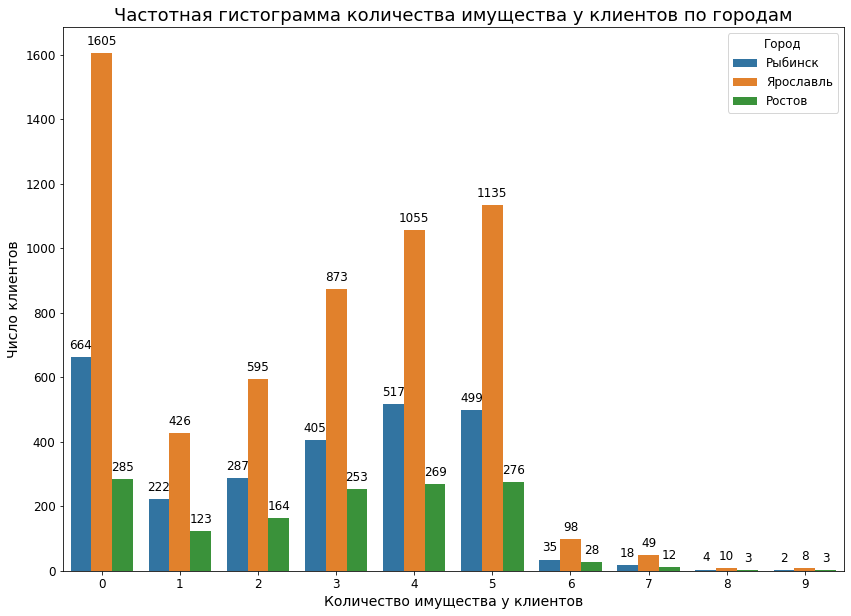

In [44]:
ax=sns.countplot(data=df,x='equity', hue='city')
label_bar(plt.gca())
set_graph('Количество имущества у клиентов','Число клиентов','Частотная гистограмма количества имущества у клиентов по городам',14,10)
plt.legend(title='Город')
plt.show()

С ростом числа квартир увеличивается и число клиентов, вплоть до 5 объектов. Странным выглядит ситуациия, где у людей 0 имущества, должно быть это какие-нибудь молодые люди? Надо это проверить.

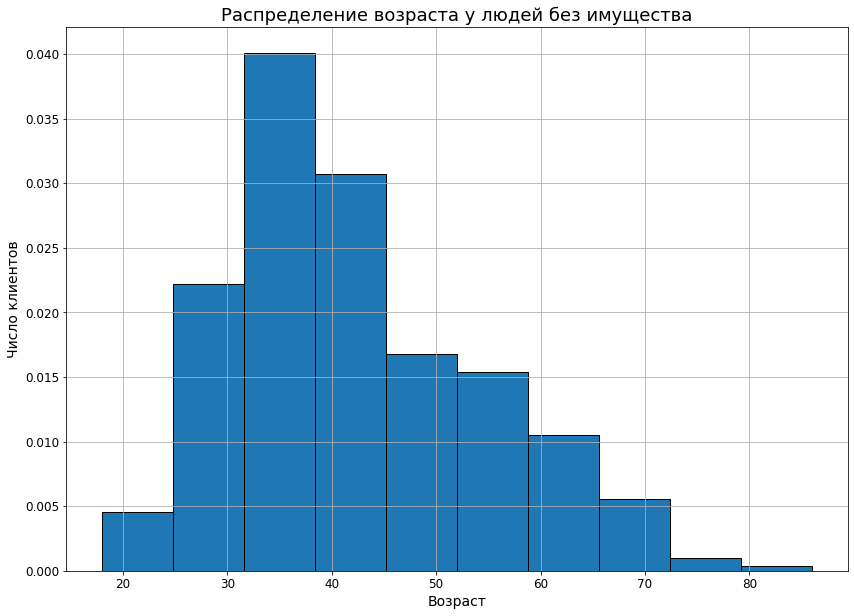

In [45]:
kwargs = dict(density=True, ec="k")
df[df['equity'] == 0]['age'].hist(**kwargs)
set_graph('Возраст','Число клиентов','Распределение возраста у людей без имущества',14,10)

Никак нет, распределение по возрасту среди этой группы людей указывает, что все нормально. Может быть тогда это в Ярославле много студентов? Надо проверить распределение в разрезе возраста.

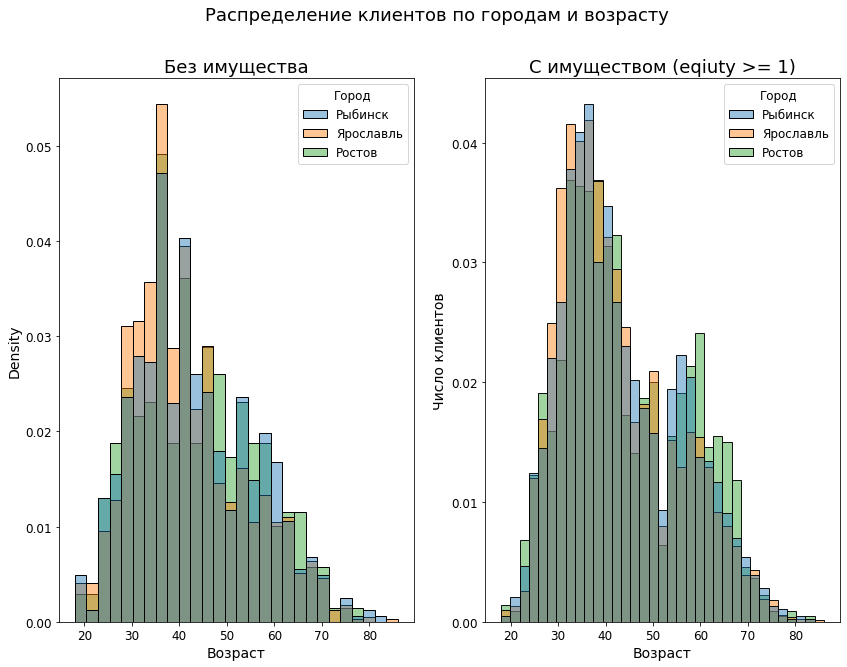

In [46]:
fig, axes = plt.subplots(1, 2,figsize=(14,10))
sns.histplot(data=df[df['equity']==0],
             x='age',
             hue='city',
             alpha=0.45,
             ax=axes[0],
             # Нормализация 
             stat='density',
            common_norm=False)
sns.histplot(data=df[df['equity'] != 0],
             x='age',hue='city',
             ax=axes[1],
             alpha=0.45,
              # Нормализация 
             stat='density',
            common_norm=False)
fig.suptitle('Распределение клиентов по городам и возрасту')
#
axes[0].set_title('Без имущества')
axes[0].set_xlabel('Возраст')
axes[1].set_ylabel('Число клиентов')
#
axes[0].get_legend().set_title("Город")
#
axes[1].set_title('С имуществом (eqiuty >= 1)')
axes[1].set_xlabel('Возраст')
axes[1].set_ylabel('Число клиентов')
axes[1].get_legend().set_title("Город")
plt.show()

Никак нет, отвергаем эту гипотезу. А что если люди с 0 имуществом становятся более частыми клиентами банка, так как пользуются различными кредитными услугами, чтобы покрыть свои потребительские потребности.

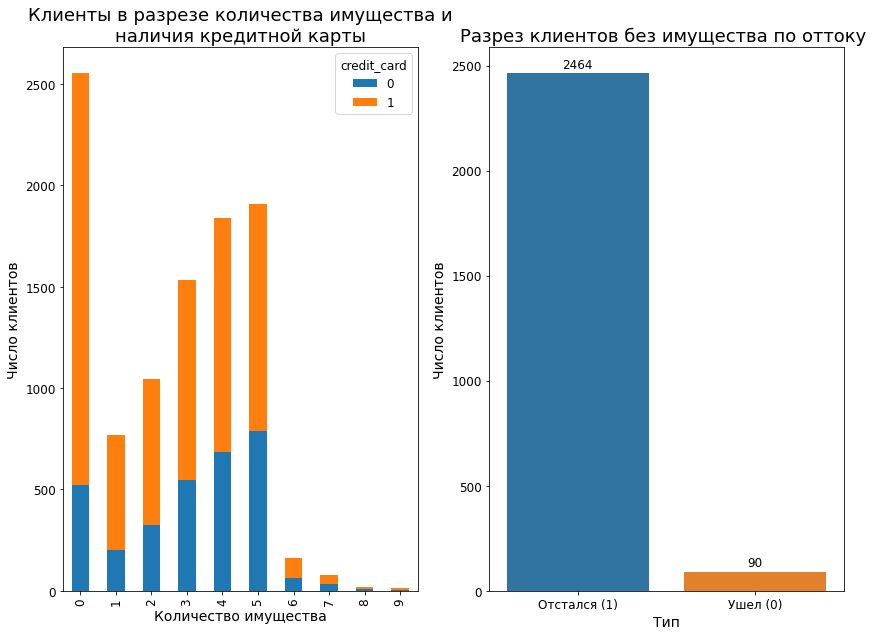

In [47]:
# График 1
fig, axes = plt.subplots(1, 2,figsize=(25,15))
df.groupby(by=['equity','credit_card']).count()['user_id'].unstack().plot(kind='bar',stacked=True,ax=axes[0])
set_graph('Число клиентов','Количество имущества','Клиенты в разрезе количества имущества и наличия кредитной карты',14,10)
axes[0].set_title('Клиенты в разрезе количества имущества и\nналичия кредитной карты')
axes[0].set_xlabel('Количество имущества')
axes[0].set_ylabel('Число клиентов')
# График 2
ax=sns.countplot(data=df.query('equity == 0 '),x='churn',ax=axes[1])
set_graph('Тип','Число клиентов','Разрез клиентов без имущества по оттоку ',14,10)
plt.gca().set_xticklabels(['Отстался (1)','Ушел (0)'])
label_bar(axes[1])
plt.show()

**Вывод:** оказалось, что клиентам без имущества свойственно держать кредитную карту и более того, они меньше всего заинтересованы в том, чтобы уходить к другим банкам.

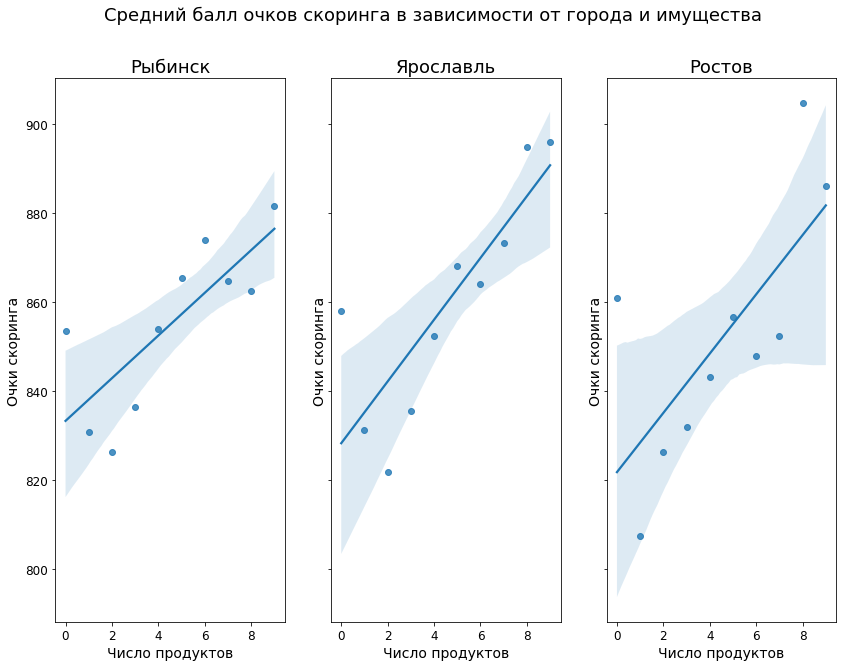

In [48]:
import scipy
df_score = df.pivot_table(index=['city','equity'],values='score',aggfunc=['mean']).reset_index()
df_score.columns = ['city','equity','avg_score']
fig, axes = plt.subplots(1, 3,figsize=(14,10),sharey='row')
fig.suptitle('Средний балл очков скоринга в зависимости от города и имущества')
# fig.set_ylabel('Среднее число очков')
# fig.xlabel('Количество имущества')
for i,city in enumerate(df['city'].unique()):
    p = sns.regplot(x=df_score.query('city == @city')['equity'],y=df_score.query('city == @city')['avg_score'],ax=axes[i])
    axes[i].set_title(city)
    axes[i].set(xlabel='Число продуктов')
    axes[i].set(ylabel='Очки скоринга')
plt.show()

**Вывод:** видно, что среднее количество очков скоринга линейно зависит от количества имущества, но город имеет меньшее значение. Можно только выделить, что при при большом объеме имущества в г. Рыбинск скорее всего дадут чуть меньше баллов, чем если бы это был другой город.

## 8 Анализ клиентов в разрезе по количеству продуктов

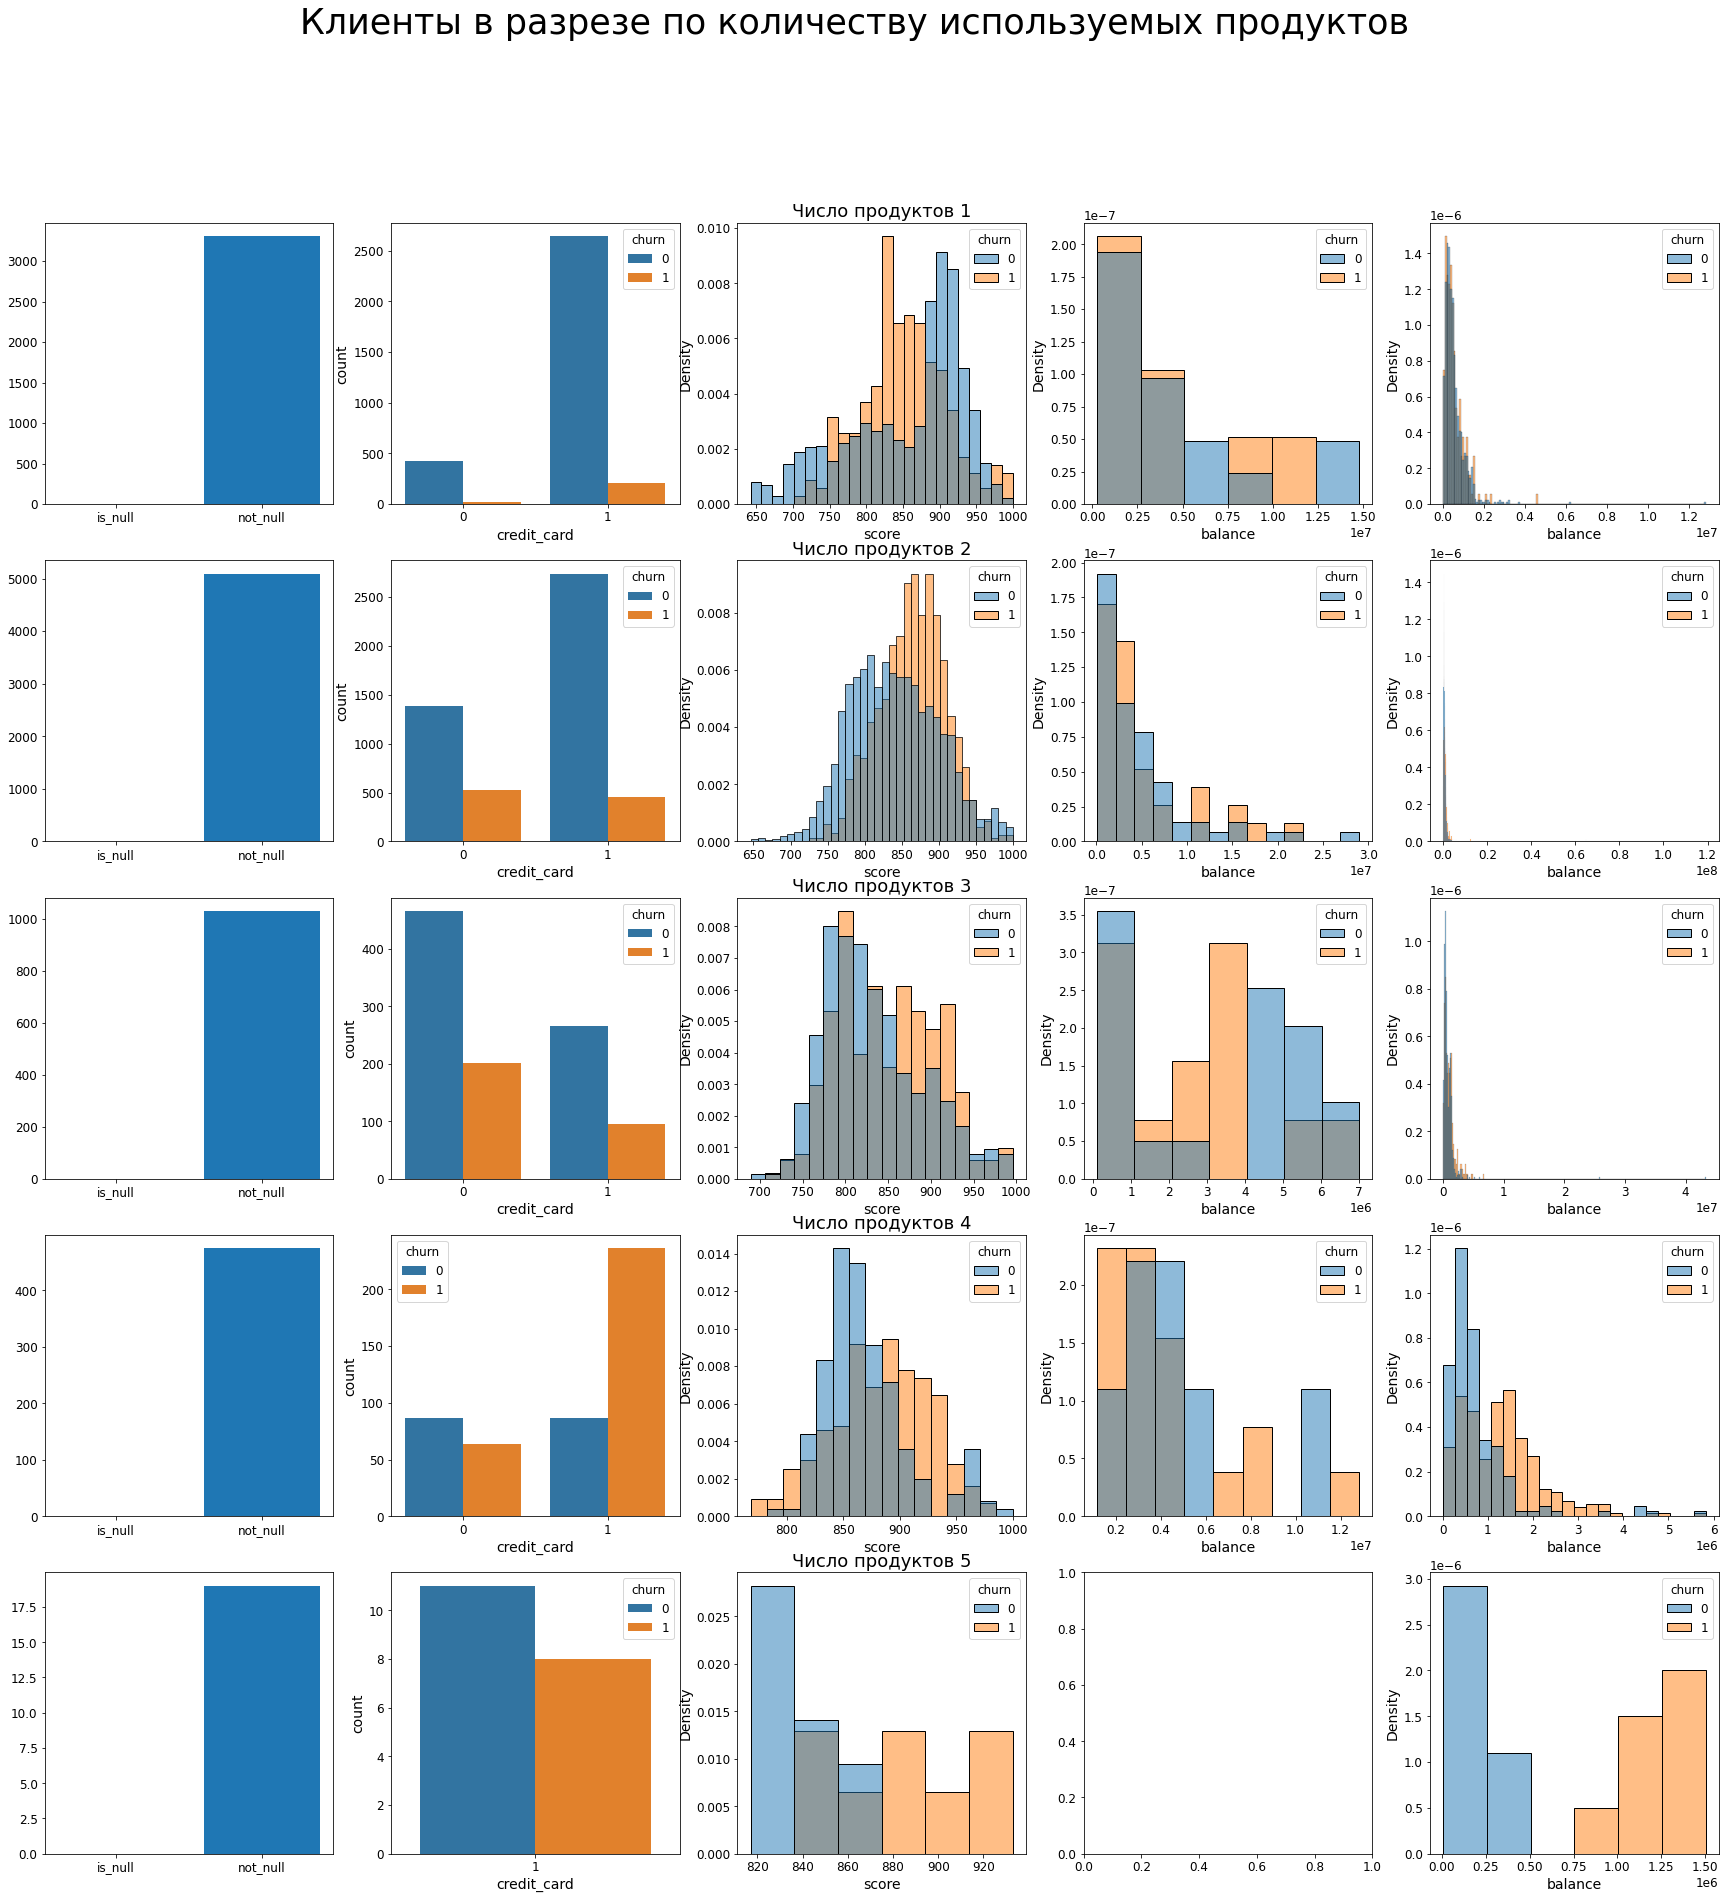

In [49]:
fig, axes = plt.subplots(5, 5,figsize=(30,30))
fig.suptitle('Клиенты в разрезе по количеству используемых продуктов',fontsize=35)
for product in range(1,6):
    df_product = df.query('products == @product')
    #График 1 - Баланс 
    null = df_product.query('balance == 0').count()['user_id']
    not_null = df_product.query('balance != 0').count()['user_id']
    info = {'is_null' : null , 'not_null' : not_null}
    plt.sca(axes[product-1][0])
    plt.bar(*zip(*info.items()))
    #График 2
    sns.countplot(data=df_product,
                 x='credit_card',
                 hue='churn',
                 ax=axes[product-1][1])
    #График 3
    sns.histplot(data=df_product,
                 x='score',
                 hue='churn',
                 ax=axes[product-1][2],
                 stat='density',
                common_norm =False )
    axes[product-1][2].set_title('\n\nЧисло продуктов ' + str(product))
    #График 4  
    sns.histplot(data=df_product.query('high_salary == 1'),
                  x='balance',
                  hue='churn',
                  ax=axes[product-1][3],
                 stat='density',
                common_norm =False)
    #График 5
    sns.histplot(data=df_product.query('high_salary == 0'),
                  x='balance',
                  hue='churn',
                  ax=axes[product-1][4],
                  stat='density',
                common_norm =False)

**График #n (где n - номер столбца)  
График #1- Количество клиентов с нулевым/ненулевым балансом    
График #2 - Количество клиентов,пользующихся кредитными картами, в разрезе по признаку churn (ушли)  
График #3 - Распределение очков скоринга в разрезе по признаку churn (ушли)  
График #4 - Распределение баланса клиентов с большими зарплатами в разрезе по признаку churn (ушли)  
График #5 - Распределение баланса клиентов с обычными зарплатами в разрезе по признаку churn (ушли)**  
Проанализировав графики, я пришел к следующим выводам.   
3) 1 продукт  
- Обладатели кредитной карты (первого своего продукта)
- Небольшая доля утекших пользователей
- Клиенты с обычными зарплатами имеют баланс до 1 миллиона рублей  

4) 2 продукта
- Доля отошедших клиентов, имеющих и не имеющих кредитной карты, равны между собой
- Доля клиентов, которые ушли от банка, имеют в среднем наибольший бал скоринга
- Большая доля клиентов владеет кредитными картами   

5) 3 продукта 
- Превалирует число людей, у которых нет кредитной карты, то есть клиенты заинтересованы во вложениях денег
- Верхняя граница баланса в распределение - 10 млн. рублей 
- Нет нулевых балансов ни у одного клиента

6) 4 продуктов
- У отошедших клиентов в среднем выше сумма на балансе, возможно, это связано с тем, что их вложения уже выросли на определенный процент, на который они рассчитывали, после чего ушли от банка
- Обладатели кредитных карт вероятнее уходят от банка
- Доля клиентов, которые ушли от банка, имеют в среднем наибольший бал скоринга

7) 5 продуктов
- Не пользуются кредитными картами 
- Зарплата обычная
- Не нулевой баланс
- У отошедших клиентов в среднем выше сумма на балансе, возможно, это связано с тем, что их вложения уже выросли на определенный процент, на который они рассчитывали, после чего ушли от банка

In [50]:
df.query('products == 5 and high_salary == 1')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_b,high_balance,high_salary,Ростов,Рыбинск,Ярославль


## 9 Корелляционный анализ 

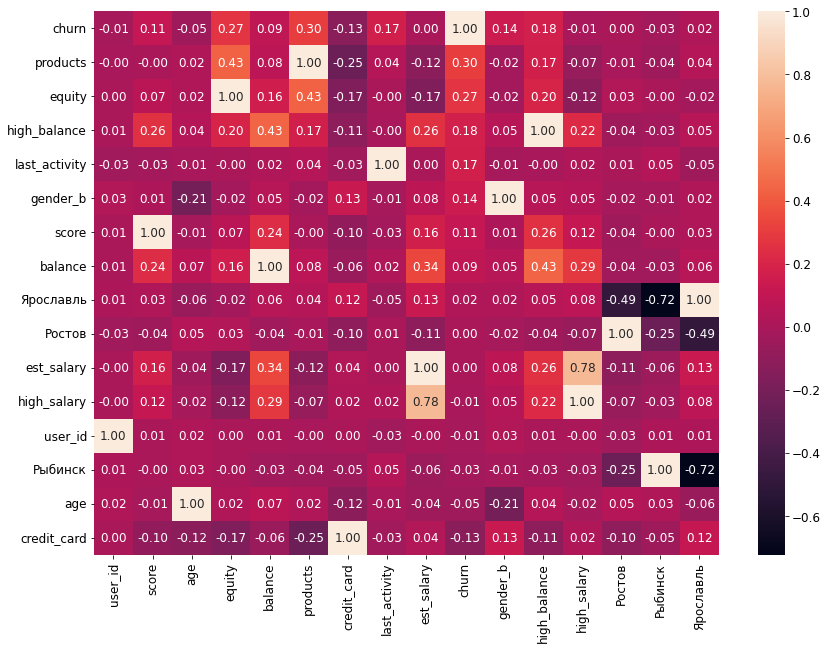

In [51]:
corr_2  = df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr_2.sort_values(by='churn',ascending=False), 
            annot = True,
            fmt = '0.2f')
plt.show()

Несложно заметить, что есть топ 3 признака, с которыми положительно коррелирует оттечность пользователей, это число продуктов, имущества, баланс карты и активность пользователей.
- Касательно числа продуктов видно, что оно имеет влияние такоого признака, как количество имущества. 
- Признак имущество коррелирует с высоким балансом на счёте (положительно)
- Признак высокий баланс естественным образом коррелирует от самого баланса, количество очков скоринга (чем их больше, тем выше баланс)

Дальше остается сегментировать клиентов по отточным и неотточным интервалам, сегменты определяются размером:
- менее 700-800 клиентов
- доля клиентов, которые отошли ~ > 40%   

В таком случае такой сегмент будет отточным, иначе неотточным (смотреть на долю клиентов, которые отошли). 
Интервалы не должны повторяться при сегментировании (когда сегментов 3-5). 


In [52]:
def cor_plot(list):
    fig,axes = plt.subplots(1,2,figsize=(17,8))
    title = ''
    for (i,atr) in enumerate(list):
        if i == 0:
            title +=list[i]
        else:
            title += ' and ' + list[i]
    fig.suptitle(title)
    df_cor = df.pivot_table(index=list,
               values=['churn','user_id'],
               aggfunc=({'churn':'mean',
                         'user_id':'count'})).unstack(list[0])
    axes[0].set_title('Уровень оттока по сегментам')
    axes[1].set_title('Размеры сегментов (количество клиентов)')
    sns.heatmap(df_cor['churn'].T,ax=axes[0],fmt='0.2f',annot=True)
    sns.heatmap(df_cor['user_id'].T,ax=axes[1],annot=True,fmt='0.0f',cmap="Greens")

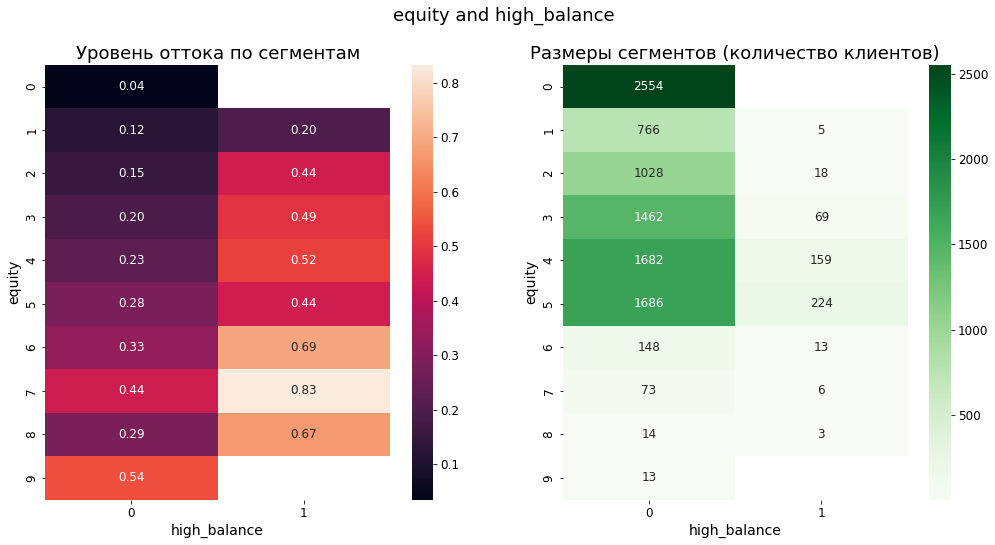

In [53]:
cor_plot(['equity','high_balance'])

Здесь хочется отметить, что высокий баланс свойственен для 5% всех клиентов, поэтому было странно рассматривать много их комбинаций, поэтому мы выделим отточные интервалы для equity по критерию high_balance, которые не будут пересекаться с другими признаками.  
- Здесь можно выделить equity между 4 и 5 клиентов с высоким балансом. Пожалуй, этого будет достаточно для параметра high_balance. 

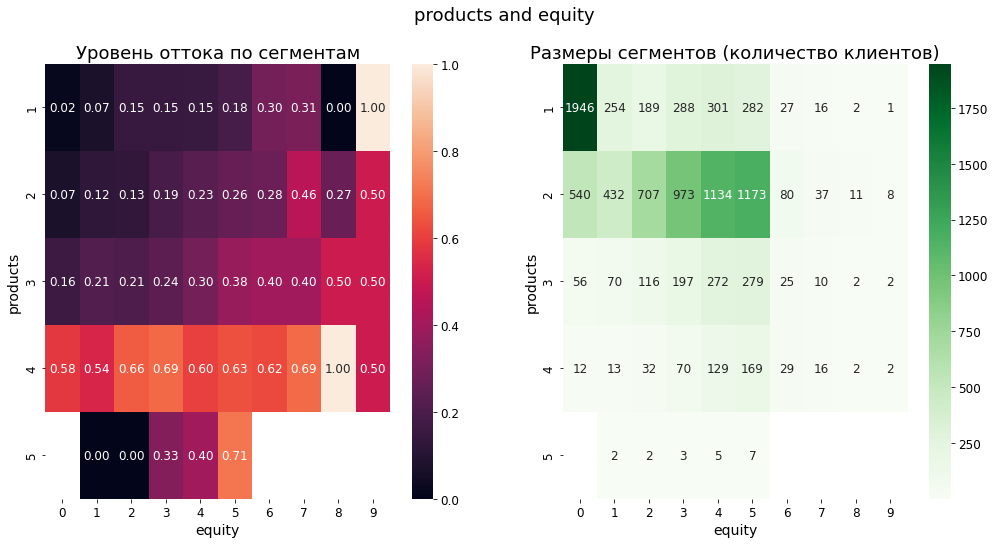

In [54]:
cor_plot(['products','equity'])

Глобально здесь можно выделить 2 отточных сегмента, это люди, которые владеют до 5 единиц имущества и более 5.
1) Те, что до 5 единиц имущества оточный сегмент находится в 3-5 продуктах, есть те, кто пользуются 3 продуктами и 4-мя пррдуктами.
Это уже 2 сегмента отточных.   
2) Для тех же, у кого больше 5 единиц ищущества, начиная с 2 продуктов возникает достаточной большой уровень оттока ~ 40%. Это тоже отдельный сегмент.

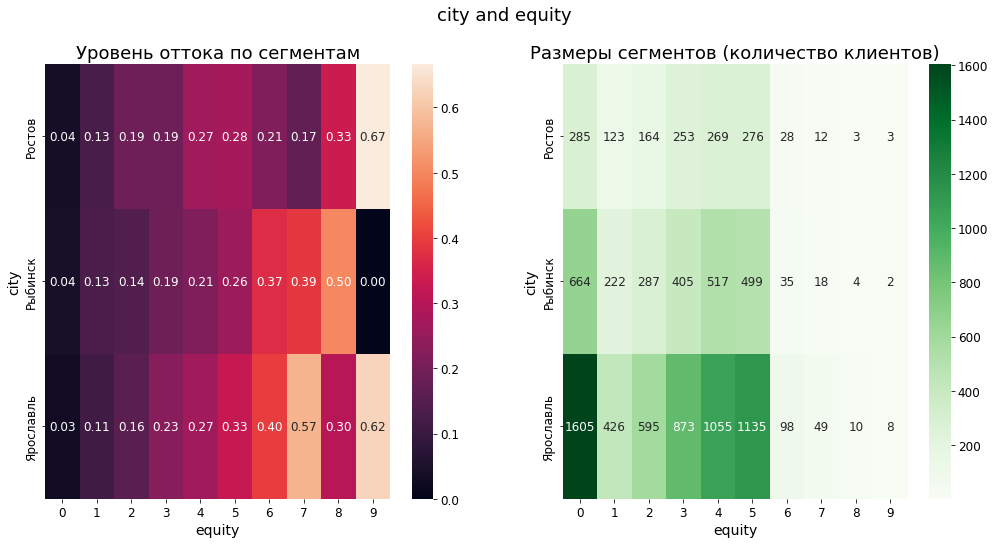

In [55]:
cor_plot(['city','equity'])

Здесь достаточным приемлимым по размеру и уровню оттока будет клиента города Рыбинска или Ярославль , у кого более 5 квартир.

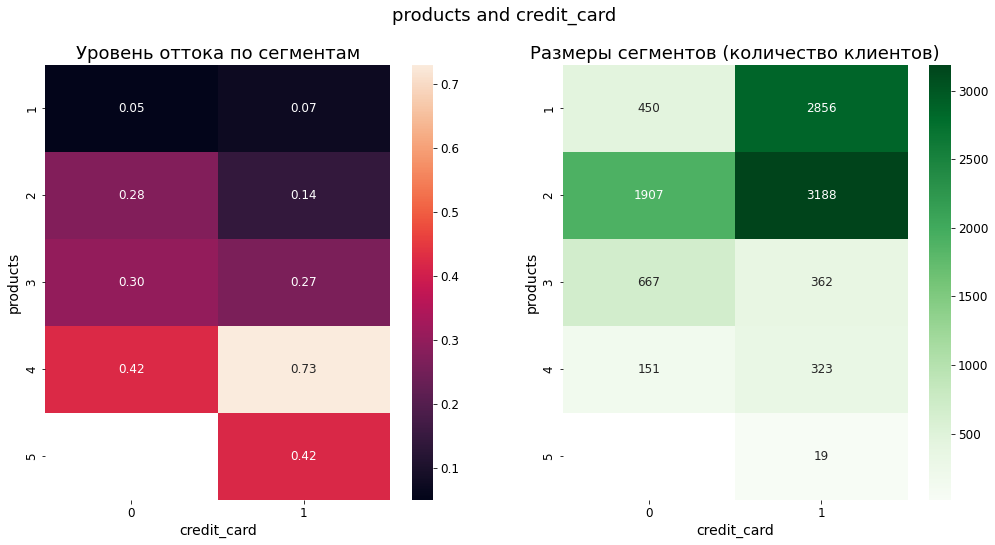

In [56]:
cor_plot(['products','credit_card'])

Здесь происходит конкуренция с products == 4 и equity < 4 и products == 4 и credit_card == 1, но можно сказать, что на самом деле этот сегмент в выборе отточного интервала products == 4 выигрывает у credit_catd, так как тут сегмент в 300 клиентов и уровень оттока в 73%.
Кроме того, здес есть люди, которые пользуются 3 продуками, в числе которых нет банковских карт, вот в этом сегменте наблюдается такой же отток.

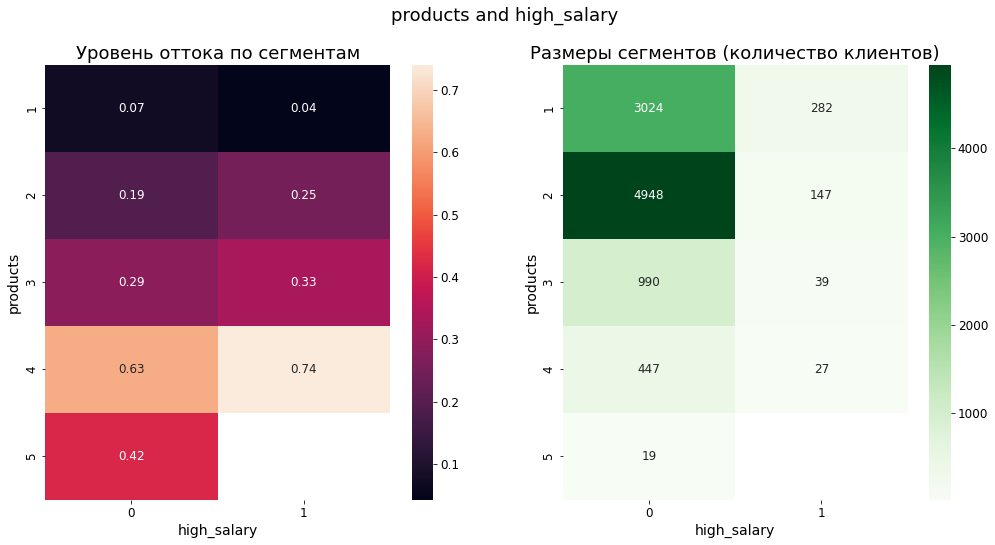

In [57]:
cor_plot(['products','high_salary'])

Здесь опять products = 4 конкурирует с кредитными картами и имуществом, но эта сегментация лучше, так по сравненвию с предыдущим сегментом здесь количественная разница в 50 клиентов, которые ушли.

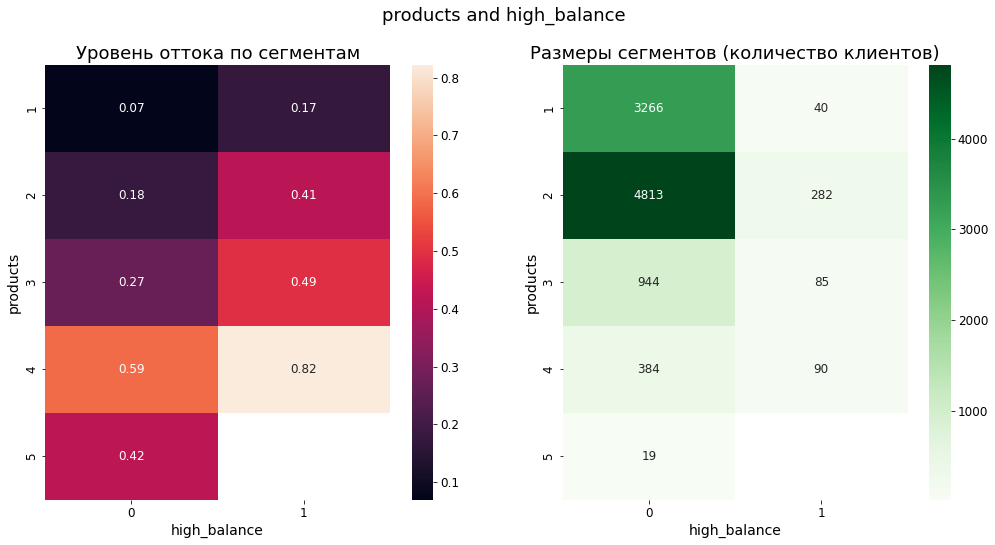

In [58]:
cor_plot(['products','high_balance'])

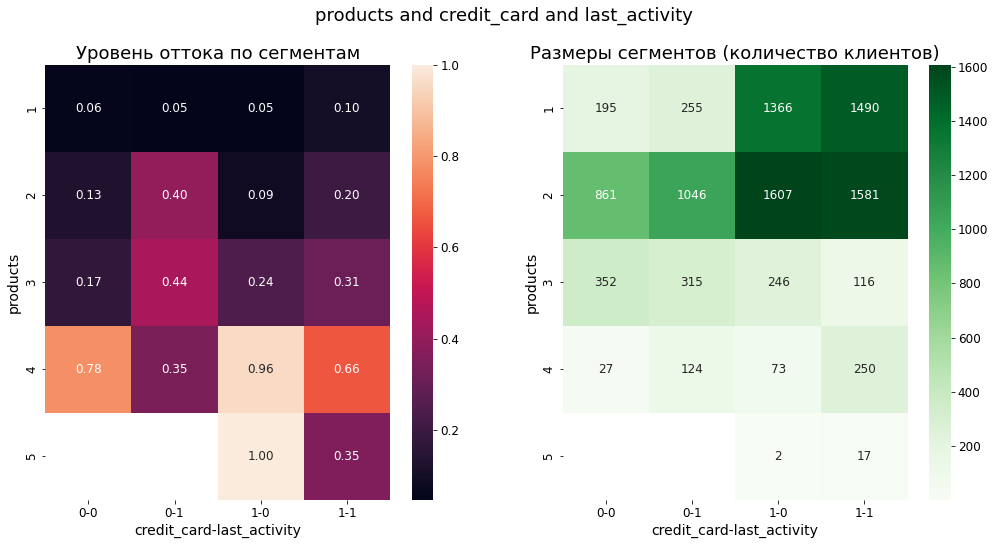

In [59]:
cor_plot(['products','credit_card','last_activity'])

Интересно заметить, что в целом, клиенты с 2 продуктами, которые не владеют кредитной картой и были активными пользователями до какого-то момента - очень вероятно уходят от банка, должно быть пользователей не удерживает те услуги, за которыми они пришли в банк (в отличии от кредитной карты, которая видимо с этим справляется). 

# Формирование портрета пользователей

### Портреты клиенты, которые маловероятно всего уходят от банка
1) Клиенты с высоким уровнем заработком

- Имеют уровень заработка больше, чем у 95 % всех клиентов. Их заработная плата составляет > 316_890 рублей.

2) Клиенты без имущества
- Пользуются кредитной картой

3) Клиенты, владеющие кредитными картами

4) Клиенты пользующиеся 1 продуктом (мб пересечение с кредитными картами)

### Портеты клиентов, которые вероятнее всего уходят от банка
1) Клиенты, которые пользуются 2 продуктами

2) Клиенты, которые пользуются более чем 2 продуктами

Признаки 1 и 2 разделены, так представляют собой совершенно разные доли оттока.

3)  Жители города Рыбинск и Ярославль, владеющие более 5  квартирами
 
4) Клиенты с кол-вом имущества 4 и 5 единиц с высоким балансом.
 
5) Клиенты, которые пользуются 4 продуктами и зарплату ниже высокой 

6) Клиенты с до 5 единиц имущества и пользующиеся 3 продуктами, 4 продуктами

7) Клиенты, пользующиеся 3 продуктами банка, в числе которых нет кредитной карты

8) Клиенты с 2 продутками, не имеют кредитной карты и были недавно активными пользователями


In [60]:
# 1 Сегментация
def describe(df_seg):
    return f'''
    Размер группы {df_seg.count()['user_id']} клиентов
    Число отточных пользователей {df_seg['churn'].sum()}
    Отток в сегменте {df_seg['churn'].mean()*100:.2f} %
    Относительный процент от всех отточных пользователей {df_seg['churn'].sum()*100/df['churn'].sum():.2f} %
    '''

In [61]:
print(f''' Сегментация клиентов, которые уходят от банка 

1. Жители города Рыбинск и Ярославль, владеющие более 5  квартирами  
{describe(df.query('6 <= equity  and (Рыбинск == 1 or Ярославль == 1)'))}
2. Клиенты, которые пользуются 4 продуктами и с обычной зарплатой 
{describe(df.query('products == 4 and high_salary == 0'))}
3.  Клиенты с кол-вом имущества 4 и 5 единиц с высоким балансом.
{describe(df.query('4 <= equity <= 5 and high_balance == 1'))}
4. Клиенты, пользующиеся 3 продуктами банка, в числе которых нет кредитной карты
{describe(df.query('products == 3 and credit_card == 0'))} 
5. Клиенты с 2 продутками, не имеют кредитной карты и были недавно активными пользователями
{describe(df.query('products == 2 and credit_card == 0 and last_activity == 1'))} ''')

 Сегментация клиентов, которые уходят от банка 

1. Жители города Рыбинск и Ярославль, владеющие более 5  квартирами  

    Размер группы 224 клиентов
    Число отточных пользователей 97
    Отток в сегменте 43.30 %
    Относительный процент от всех отточных пользователей 5.34 %
    
2. Клиенты, которые пользуются 4 продуктами и с обычной зарплатой 

    Размер группы 447 клиентов
    Число отточных пользователей 280
    Отток в сегменте 62.64 %
    Относительный процент от всех отточных пользователей 15.40 %
    
3.  Клиенты с кол-вом имущества 4 и 5 единиц с высоким балансом.

    Размер группы 383 клиентов
    Число отточных пользователей 181
    Отток в сегменте 47.26 %
    Относительный процент от всех отточных пользователей 9.96 %
    
4. Клиенты, пользующиеся 3 продуктами банка, в числе которых нет кредитной карты

    Размер группы 667 клиентов
    Число отточных пользователей 201
    Отток в сегменте 30.13 %
    Относительный процент от всех отточных пользователей 11.06 %
    

# Проверка гипотез
1. Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.
2. Проверьте гипотезу, что доли ушедших клиентов, разделенных по полу, равны между собой.

## 1. Есть ли различия в среднем доходе между клиентами, которые ушли и теми, которые остались. 
Прежде всего, я выбираю непараметрический тест Уилкоксона-Манна-Уитни, который является непараметрическим, что обозначает, что он устойчив к аномалиям в выборках.  

`Нулевая гипотеза: средний доход между клиентами, которые ушли и остались, не отличается `  

`Альтернативная гипотеза: средний доход  клиентов, которые ушли от банка, больше, чем у оставшихся `  

Была сформулирована одностороняя гипотеза, из-за этого необходимо `p_value` поделить пополам и проверять значения среднего.

In [62]:
from scipy import stats as st

#df['balance'].fillna(0,inplace=True)

balance_churn = df.query('churn == 1')['balance'].fillna(0)

balance_non_churn = df.query('churn == 0')['balance'].fillna(0)

alpha = 0.1  # критический уровень статистической значимости

results = st.mannwhitneyu(balance_churn, balance_non_churn)

print('p-значение: ', results.pvalue / 2 )

if (results.pvalue / 2 < alpha) and (balance_non_churn.mean() > balance_churn.mean()) :
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 


p-значение:  1.4908094535606926e-217
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


**Вывод:** при тестировании гипотез подтвердилась нулевая гипотеза - `средний доход между клиентами, которые ушли и остались, не отличается`. 

## 2. Есть ли различия в долях ушедших клиентов, разделенных по полу?

Разница между пропорциями, наблюдаемыми на выборках, будет нашей статистикой. Величина Z — стандартная для критерия со стандартным нормальным распределением: со средним, равным нулю, и стандартным отклонением, равным единице.  
Поскольку полученная статистика будет распределена нормально, так можно проводить двусторонние и односторонние тесты.   
При той же нулевой гипотезе о равенстве пропорций двух генеральных совокупностей можно проверить альтернативные гипотезы.

`Нулевая гипотеза: доля мужчин средин ушедших клиентов равна доле женщин, которые ушли от банка`    

`Альтернативная гипотеза: доли ушедших мужчин и женщин не равны между собой `  

Сосчитаем, сколько клиентов по полу ушло.

In [63]:
man = df.query('gender_b == 1').count()['user_id']
woman = df.query('gender_b == 0').count()['user_id']
man_loss = df.query('gender_b == 1 and churn == 1').count()['user_id']
woman_loss = df.query('gender_b == 0 and churn == 1').count()['user_id']
loss = [man_loss, woman_loss]
total = [man, woman]
p1 = loss[0]/total[0]
p2 = loss[1]/total[1]
# Доля всех оттоошедших клиентов
p_combined = df.query('churn == 1')['user_id'].count()/df.shape[0]
difference = p1 - p2 

In [64]:
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/total[0] + 1/total[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


In [65]:
print('Доля мужчин в выборке: ', p1)
print('Доля женщин в выборке: ', p2)

Доля мужчин в выборке:  0.23798028565680948
Доля женщин в выборке:  0.12823101777059773


**Вывод:** нулевая гипотеза не подтвердилась, доли ушедших мужчин и женщин не равны между собой, что на самом деле было достаточно вероятно, если посмотреть на эти самые доли.

# Общие рекомендации
Прежде всего составим краткие выводы, а потом сделаем предложения по удержанию пользователей.   
**1. Краткие выводы** 

1.8 тыс. клиентов ушли от банка, а 8.1 тыс. клиентов продолжают пользоваться услугами банка.
 
Ярославль самый популярный город в датасете (> 50% всех клиентов), затем Рыбинск и Ростов.

Размах возраста клиентов по полу приблизительно одинаковый, медианное значение в общем случае составляет 40 лет.  

Корреляции между кредитной картой и зарплатой или возрастом клиента - нет.  

С ростом числа квартир увеличивается и число клиентов, вплоть до 5 объектов, это справедливо для каждого города в датасете. Кроме того подтвердилась гипотеза, что средний баллл скоринга по городам коррелирует с количеством имущества у клиента.

Клиентам без имущества свойственно держать кредитную карту и более того, они меньше всего заинтересованы в том, чтобы уходить к другим банкам.  

Также на диаграмме размаха заработной платы клиентов, выделились аномалии, котоыре были отнесены к выскоми зарплатам. Всего клиентов, имеющих высокие зарплаты:  497. Относительное число оттошедших клиентов с высокими зарплатами: 0.826 процентов от всего датасета. Процент клиентов с высокими зарплатами  4.505 процента от всего числа ушедших людей. 

К параметрам, влияющим на уровень оттока клиентов:
1) уровнень заработка       
- с уровнем заработка больше, чем у 95 % всех клиентов, с высоким уровнем з/п менее склоны уходить    
2) количество имущества,     
- клиенты без имущества не склонны уходить банка    
3) клиенты, владеющие кредитными картами    
- наличие кредитной карты удерживает пользователей  
4) недавняя активность клиентов    
5) баллы скоринга (у отошедших клиентов он более высокий)    


Был протестированы поставленные гипотезы, во-первых оказалось, что  средний доход между клиентами, которые ушли и остались, не отличается, а во-вторых - доли ушедших от банка мужчин и женщин не равны между собой. Большая доля ушедших клиентов - мужчины. 

**2. Рекомендации**

1. Жители города Рыбинск и Ярославль, владеющие более 5  квартирами  

    Размер группы 224 клиентов  
    Число отточных пользователей 97  
    Отток в сегменте 43.30 %  
    Относительный процент от всех отточных пользователей 5.34 %  
    
**Рекомендация по удержанию:** 
- предложить услуги по страхованию недвижимости 
- предложить кэшбек на товары для дома и хозяйства


2. Клиенты, которые пользуются 4 продуктами и с обычной зарплатой 

    Размер группы 447 клиентов  
    Число отточных пользователей 280  
    Отток в сегменте 62.64 %  
    Относительный процент от всех отточных пользователей 15.40 %  
    
**Рекомендация по удержанию:** 
- делать предложения 
- информировать о новых продуктах банка
- провести ребрединг продуктов, сформировать ключевые преищущества над банками-конкурентами

3.  Клиенты с количеством имущества 4 и 5 единиц с большим балансом.

    Размер группы 383 клиентов  
    Число отточных пользователей 181  
    Отток в сегменте 47.26 %  
    Относительный процент от всех отточных пользователей 9.96 %  
  
    
**Рекомендация по удержанию:**  
- предложить услуги по страхованию недвижимости 
- найти предожение выгодной ипотеки 
- предложить инвестиции, вклады для увеличения денег

    
4. Клиенты, пользующиеся 3 продуктами банка, в числе которых нет кредитной карты

    Размер группы 667 клиентов  
    Число отточных пользователей 201  
    Отток в сегменте 30.13 %  
    Относительный процент от всех отточных пользователей 11.06 %  
    
**Рекомендация по удержанию:** 
- предложить кредитную карты
- информировать о новых продуктах банка
- сделать выгодные условия для получения кредитной карты, которые будут связаны с предыдущими продуктами

5. Клиенты с 2 продутками, не имеют кредитной карты и были недавно активными пользователями

    Размер группы 1046 клиентов  
    Число отточных пользователей 417  
    Отток в сегменте 39.87 %  
    Относительный процент от всех отточных пользователей 22.94 %  
  
**Рекомендация по удержанию:** 
- сделать выгодные условия для получения кредитной карты, которые будут связаны с предыдущими продуктами
- проинформировать о существующих продуктах, в том числе о кредитной карте